<a href="https://colab.research.google.com/github/akashsahu992906/machine-learning-projects-/blob/main/EDUREKA_CONSUMER_COMPLAINTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **IMPORT LIBRARIES AND DATASET**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_train=pd.read_csv("/content/Edureka_Consumer_Complaints_train.csv",parse_dates=['Date received','Date sent to company'])
data_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [ ]:
data_train.shape

(358810, 18)

***Dataset information***

In [ ]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Date received                 358810 non-null  datetime64[ns]
 1   Product                       358810 non-null  object        
 2   Sub-product                   255024 non-null  object        
 3   Issue                         358810 non-null  object        
 4   Sub-issue                     139436 non-null  object        
 5   Consumer complaint narrative  56180 non-null   object        
 6   Company public response       67931 non-null   object        
 7   Company                       358810 non-null  object        
 8   State                         355907 non-null  object        
 9   ZIP code                      355899 non-null  object        
 10  Tags                          50226 non-null   object        
 11  Consumer cons

***Missing Values***

In [ ]:
#Analyze the missing values in the columns
miss_df=pd.DataFrame({'columns':data_train.columns,'missing values':[sum(data_train[x].isnull()) for x in data_train.columns],'missing ratio':[sum(data_train[x].isnull())/data_train.shape[0] for x in data_train.columns]})

In [ ]:
#columns with missing values greater than zero
miss_df[miss_df['missing ratio']>0]

,columns,missing values,missing ratio
2,Sub-product,103786,0.289251
4,Sub-issue,219374,0.611393
5,Consumer complaint narrative,302630,0.843427
6,Company public response,290879,0.810677
8,State,2903,0.008091
9,ZIP code,2911,0.008113
10,Tags,308584,0.860021
11,Consumer consent provided?,257230,0.716898


In [ ]:
#columns with missing values in descending order 
miss_df.sort_values(by="missing ratio",ascending=False)

,columns,missing values,missing ratio
10,Tags,308584,0.860021
5,Consumer complaint narrative,302630,0.843427
6,Company public response,290879,0.810677
11,Consumer consent provided?,257230,0.716898
4,Sub-issue,219374,0.611393
2,Sub-product,103786,0.289251
9,ZIP code,2911,0.008113
8,State,2903,0.008091
13,Date sent to company,0,0.000000
16,Consumer disputed?,0,0.000000


In [ ]:
import missingno as msno

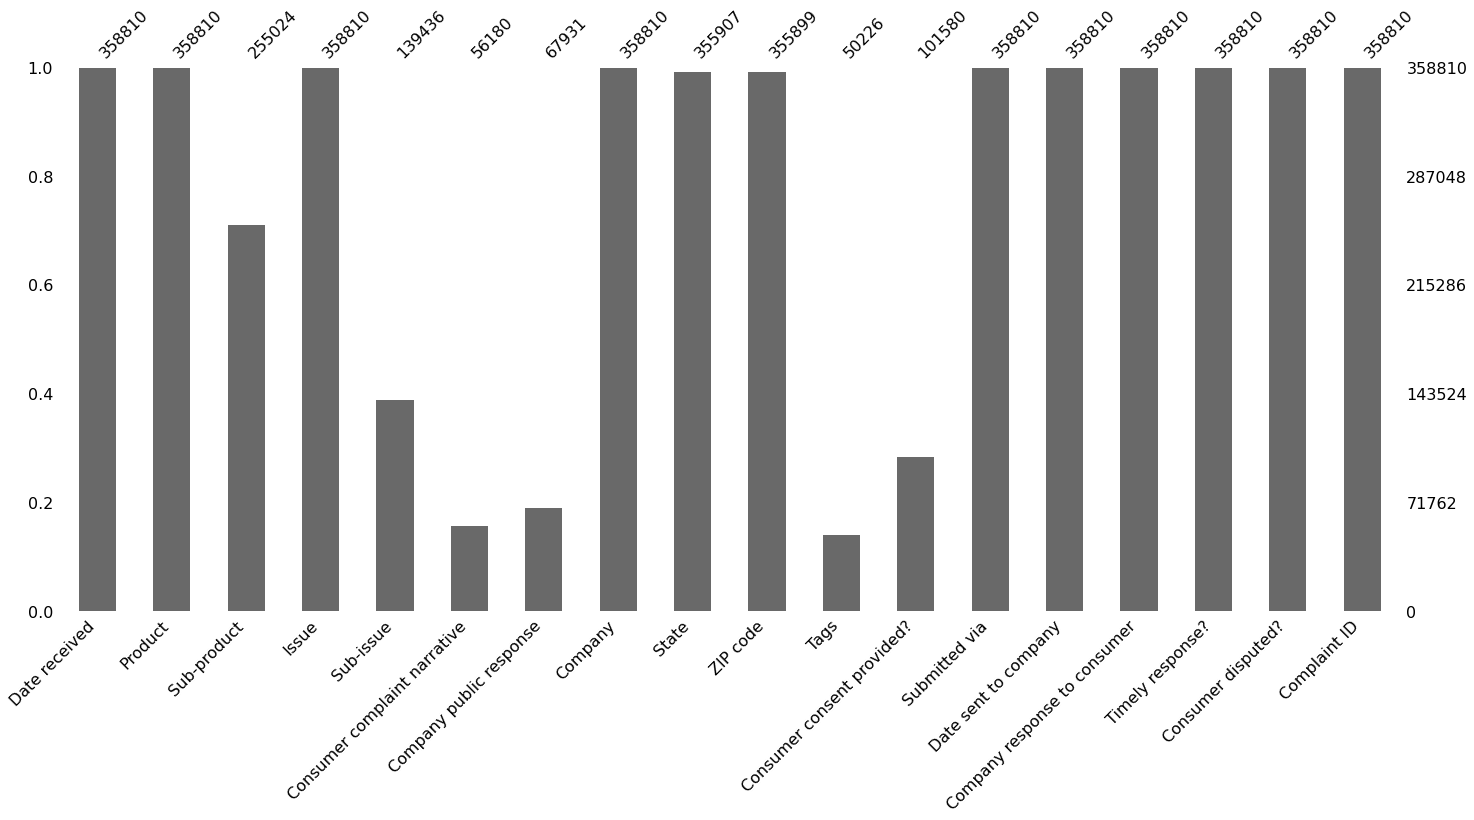

In [ ]:
#bar plot describing the missing values in each column 
#tags,consumer complaint narrative,company public response, consumer consent provided,sub issue have more than 50% of their records missing 

msno.bar(data_train)


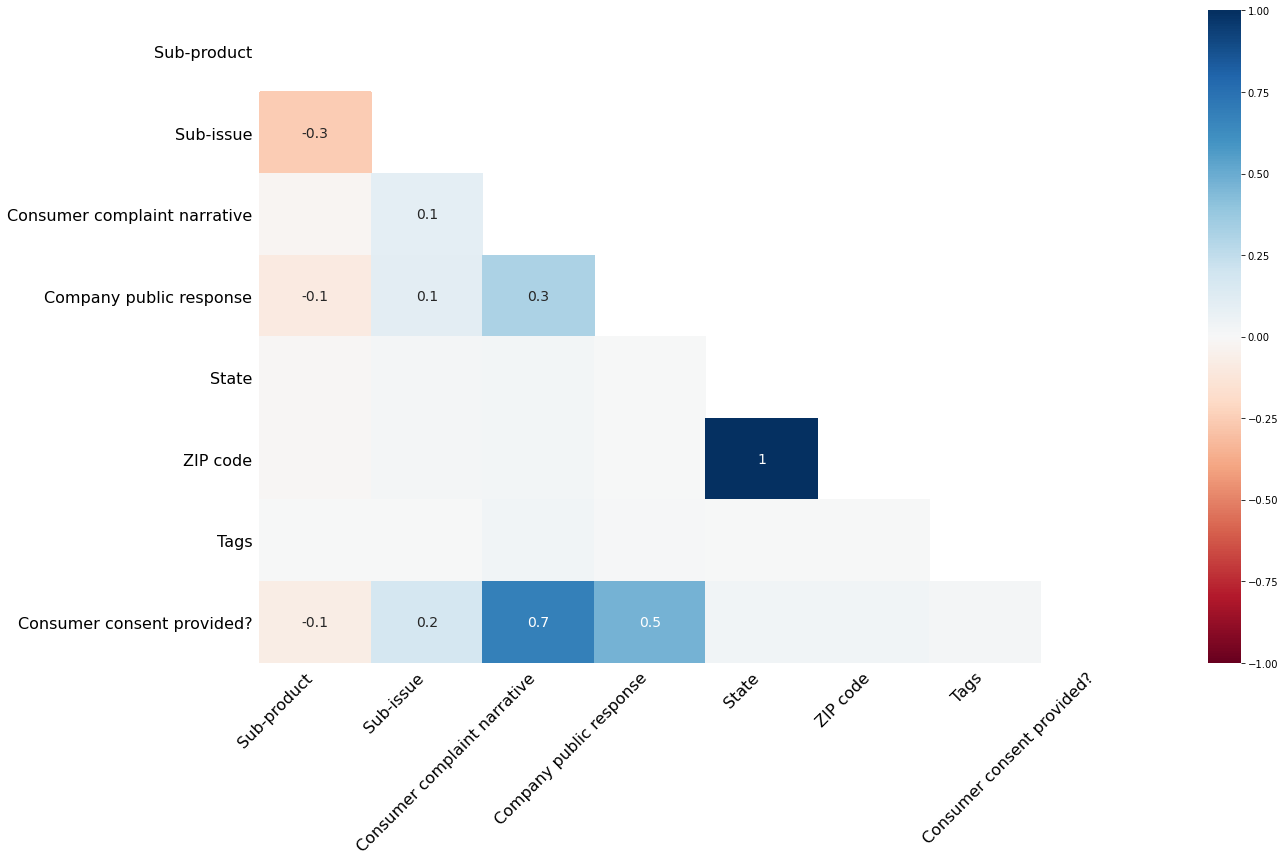

In [ ]:
# heatmap of missing values, gives the correlation between missing value occurence of two variables
#State and zipcode have a correlation of 1, meaning both state and zip code have missing values in the same row(instance) 
msno.heatmap(data_train)

**No of unique values and most frequent categories in the columns ** 

In [ ]:
unique_df=pd.DataFrame({'columns':data_train.columns,'unique':[len(data_train[i].unique()) for i in data_train.columns],'most_frequent':[data_train[i].value_counts().head(1).index[0] for i in data_train.columns]})
unique_df

,columns,unique,most_frequent
0,Date received,1758,2015-08-27 00:00:00
1,Product,12,Mortgage
2,Sub-product,48,Other mortgage
3,Issue,95,"Loan modification,collection,foreclosure"
4,Sub-issue,68,Account status
5,Consumer complaint narrative,55536,This company continues to report on my credit ...
6,Company public response,11,Company chooses not to provide a public response
7,Company,3064,Bank of America
8,State,63,CA
9,ZIP code,24182,300XX


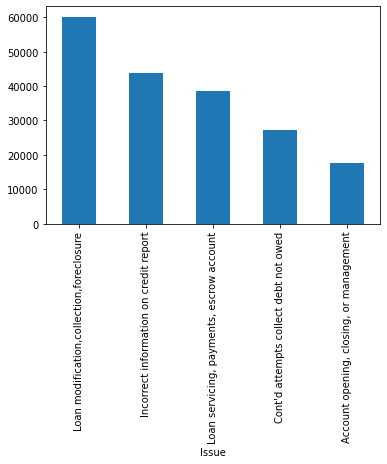

In [ ]:
## top 5 issues raised by customer


data_train.groupby('Issue')['Issue'].count().sort_values(ascending=False).head(5).plot(kind="bar",stacked=True)


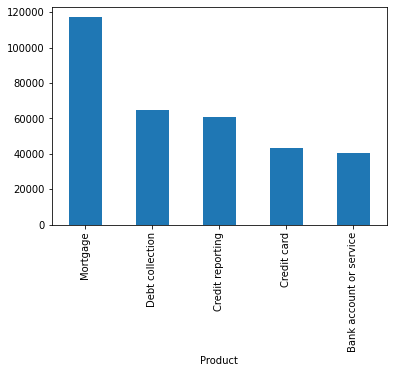

In [ ]:
# products ranked by number of complaints(top5)
data_train.groupby('Product')['Complaint ID'].count().sort_values(ascending=False).head(5).plot(kind='bar',stacked=True)

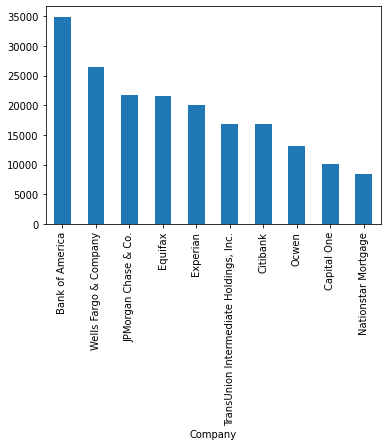

In [ ]:
#Companies ranked by number of complaints(top10)
data_train.groupby('Company')['Complaint ID'].count().sort_values(ascending=False).head(10).plot(kind='bar',stacked=False)

In [ ]:
#medium of complaints submitted
data_train['Submitted via'].unique()

array(['Web', 'Phone', 'Referral', 'Postal mail', 'Fax', 'Email'],
      dtype=object)

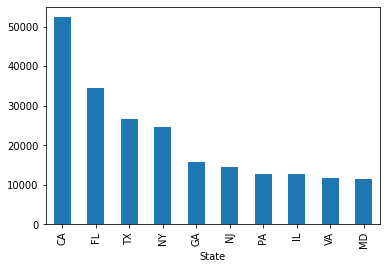

In [ ]:
#geographical distribution of complaints (top10 states)
data_train.groupby(['State'])['Complaint ID'].count().sort_values(ascending=False).head(10).plot(kind='bar',stacked=True)

In [ ]:
data_train['Month']=data_train['Date received'].dt.month


In [ ]:
data_train['day of the week']=data_train['Date received'].dt.dayofweek


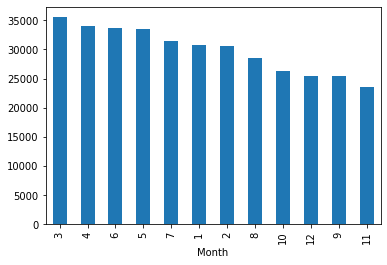

In [ ]:
# complaints per month 
data_train.groupby('Month')['Complaint ID'].count().sort_values(ascending=False).plot(kind='bar',stacked=True)

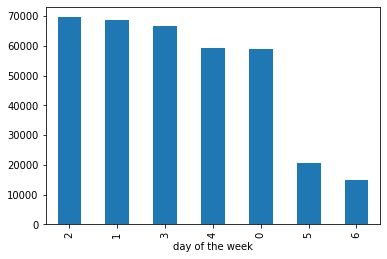

In [ ]:
#complaints per day of the week
data_train.groupby('day of the week')['Complaint ID'].count().sort_values(ascending=False).plot(kind='bar',stacked=True)

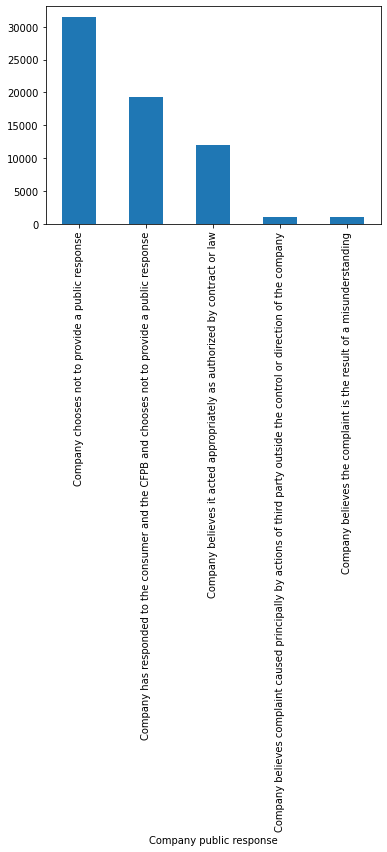

In [ ]:
# types of public response (top5)
data_train.groupby(['Company public response'])['Complaint ID'].count().sort_values(ascending=False).head(5).plot(kind="bar",stacked=False)

In [ ]:
# 'timely response' relation with 'consumer disputed?'
pd.crosstab(data_train['Timely response?']=='Yes',data_train['Consumer disputed?'])


Consumer disputed?,No,Yes
Timely response?,,
False,4906,1229
True,277732,74943


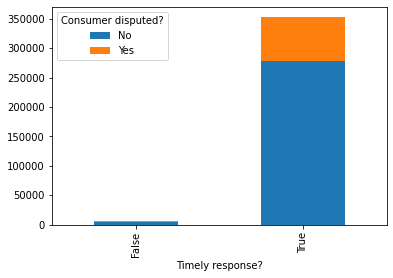

In [ ]:
# from the barplot we observe when timely response is given the consumer disputes less
pd.crosstab(data_train['Timely response?']=='Yes',data_train['Consumer disputed?']).plot(kind="bar",stacked=True)

In [ ]:
#drop unwanted variables
#complaint id conveys no relevant information
#Tags have a very high number of missing values and convey no important information
#Zip code conveys similar information about location as state does and since both have same % of missing values we use state variable and drop ZIP code 
data_train=data_train.drop(['Complaint ID','Tags','ZIP code','Sub-issue'],axis=1)

*** Part 2-Text based modelling ***

In [ ]:
data_train_new=data_train[['Consumer complaint narrative','Product']]
data_train_new

In [ ]:
data_train_new=data_train_new.dropna(how='any',axis=0)


In [ ]:
data_train_new.reset_index(drop=True)

In [ ]:
#preprocess 
import nltk
import re
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

def preprocess(text):
    
    text=re.sub('[^a-zA-Z]',' ',text)
    text=re.sub('XXXX',' ',text)
    text=re.sub('XXXX XXXX',' ',text)
    text=re.sub('XXXX XXXX XXXX',' ',text)
    text=text.lower()
    text=re.sub(r'\W', ' ', text)
    text=re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text=re.sub(r'\^[a-zA-Z]\s+', ' ', text) 
    text=re.sub(r'\s+', ' ', text, flags=re.I)
    text=re.sub(r'^b\s+', '', text)
    text=[char for char in text if char not in string.punctuation]
    text=''.join(text)
    text=[word for word in text.split() if word.lower() not in stopwords.words('english')]
    text=" ".join(text)
    text=[lemmatizer.lemmatize(w,pos='v') for w in text.split()]
    return " ".join(text)
    

In [ ]:
data_train_new['preprocessed']=data_train_new.loc[:,'Consumer complaint narrative'].apply(preprocess)

In [ ]:
data_train_new

In [ ]:
data_train_new['preprocessed'].iloc[1,]

In [ ]:
#tf-idf vectorise 
from sklearn.feature_extraction.text import TfidfVectorizer 
#unigrams with max_features=50
vectorizer=TfidfVectorizer(lowercase=True,max_features=50,ngram_range=(1,1))
X=data_train_new['preprocessed'].values
Y=data_train_new['Product'].values
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
Y=lb.fit_transform(Y)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
x_train_idf=vectorizer.fit_transform(x_train)
x_test_idf=vectorizer.transform(x_test)




In [ ]:
#Training the model
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train_idf,y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

**Accuracy with mnb**

In [ ]:
#predicting the product variable
pred=mnb.predict(x_test_idf)
pred

array([4, 6, 3, ..., 3, 2, 0])

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.6399667734662394


**Accuracy with Svm**

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train_idf,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred_s=svc.predict(x_test_idf)

In [ ]:
acc_score_s=accuracy_score(y_test,pred_s)
acc_score_s

0.6972825442031565

**Final missing values analysis**

In [ ]:

data_train['Company public response_null']=np.where(data_train['Company public response'].isnull(),1,0)
data_train.groupby(['Consumer disputed?'])['Company public response_null'].mean()
# company public response is missing at random so can be imputed by most frequent category

Consumer disputed?
No     0.809240
Yes    0.816009
Name: Company public response_null, dtype: float64

In [ ]:
data_train['Consumer consent provided?_null']=np.where(data_train['Consumer consent provided?'].isnull(),1,0)
data_train.groupby(['Consumer disputed?'])['Consumer consent provided?_null'].mean()

Consumer disputed?
No     0.724110
Yes    0.690135
Name: Consumer consent provided?_null, dtype: float64

In [ ]:
data_train['Consumer complaint narrative_null']=np.where(data_train['Consumer complaint narrative'].isnull(),1,0)
data_train.groupby(['Consumer disputed?'])['Consumer complaint narrative_null'].mean()

Consumer disputed?
No     0.851276
Yes    0.814302
Name: Consumer complaint narrative_null, dtype: float64

In [ ]:
data_train['Sub-issue_null']=np.where(data_train['Sub-issue'].isnull(),1,0)
data_train.groupby(['Consumer disputed?'])['Sub-issue_null'].mean()

Consumer disputed?
No     0.600015
Yes    0.653613
Name: Sub-issue_null, dtype: float64

In [ ]:
data_train['Sub-product_null']=np.where(data_train['Sub-product'].isnull(),1,0)
data_train.groupby(['Consumer disputed?'])['Sub-product_null'].mean()

Consumer disputed?
No     0.295682
Yes    0.265386
Name: Sub-product_null, dtype: float64

In [ ]:
data_train['State']=np.where(data_train['State'].isnull(),1,0)
data_train.groupby(['Consumer disputed?'])['State'].mean()

Consumer disputed?
No     0.008414
Yes    0.006892
Name: State, dtype: float64

**Part 3 model classification and feature engineering**

In [ ]:

#extract month and weekdays of date received and sent to the company 

data_train['month sent to company']=data_train['Date sent to company'].dt.month
data_train['month received']=data_train['Date received'].dt.month


data_train

In [ ]:
#remove irrelevant features
data_train_rel=data_train.drop(['Date received','Date sent to company','Consumer complaint narrative'],axis=1)
data_train_rel

In [ ]:
#Splitting dataset 
X=data_train_rel.drop(['Consumer disputed?'],axis=1)
Y=data_train_rel['Consumer disputed?']
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
Y=lb.fit_transform(Y)
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y,shuffle=True)


array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
#numerical columns of training data
num_cols=[i for i in X_train.columns if X_train[i].dtypes!="O"]
#categorical columns of training data
cat_cols=[i for i in X_train.columns if X_train[i].dtypes=="O"]
cat_cols


In [ ]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#impute missing values for training 
for i in cat_cols:
       X_train[i]=X_train[i].fillna(X_train[i].mode()[0])
#impute missing values for validation
for i in cat_cols:
      X_val[i]=X_val[i].fillna(X_val[i].mode()[0])

In [ ]:
#null values after imputing 
X_train.isnull().sum()

Product                         0
Sub-product                     0
Issue                           0
Company public response         0
Company                         0
State                           0
Consumer consent provided?      0
Submitted via                   0
Company response to consumer    0
Timely response?                0
month sent to company           0
month received                  0
dtype: int64

In [ ]:
#null values after imputing 
X_val.isnull().sum()

Product                         0
Sub-product                     0
Issue                           0
Company public response         0
Company                         0
State                           0
Consumer consent provided?      0
Submitted via                   0
Company response to consumer    0
Timely response?                0
month sent to company           0
month received                  0
dtype: int64

**Encode categorical variables**

In [ ]:
#encode categorical variables 
def encode(df,column):
         top10=df[column].value_counts().sort_values(ascending=False).head(10).index
         for categories in top10:
            df[categories]=np.where(df[column]==categories,1,0)



In [ ]:
for i in cat_cols:
      encode(X_train,i)

In [ ]:
for i in cat_cols:
    encode(X_val,i)

In [ ]:
X_train=X_train.drop(cat_cols,axis=1)


In [ ]:
X_val=X_val.drop(cat_cols,axis=1)

In [ ]:
X_val

**Model fitting and accuracy score**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
Y_train_df=pd.DataFrame(Y_train)
Y_train_df.value_counts()

0    197847
1     53320
dtype: int64

In [ ]:
#accuracy score
pred=mnb.predict(X_val)
score=mnb.score(X_val,Y_val)
from sklearn.metrics import accuracy_score
accuracy_score(Y_val,pred)

0.7875384372416228

In [ ]:
Y_val_df=pd.DataFrame(Y_val)
Y_val_df.value_counts()

0    84791
1    22852
dtype: int64

In [ ]:
for i in cat_cols:
      X[i]=X[i].fillna(X[i].mode()[0])

In [ ]:
for i in cat_cols:
      encode(X,i)

**Cross validation**

In [ ]:
X=X.drop(cat_cols,axis=1)

In [ ]:


mnb.fit(X,Y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#cross_val_Score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=5,random_state=100,shuffle=True)
crossval=cross_val_score(mnb,X,Y,scoring='accuracy',cv=kfold,n_jobs=-1)
print(crossval.mean())

0.7873693598283213


**Model training and Evaluation**

In [ ]:
#hyperparameter optimisation
alpha=[0,0.5,1]


grid={'alpha':alpha,
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(estimator=mnb,param_distributions=grid,cv=5,n_iter=50,scoring='accuracy',verbose=5,random_state=0,return_train_score=True)

In [ ]:
random_cv.fit(X_train,Y_train)

In [ ]:
random_cv.best_estimator_

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [ ]:
mnb_best=MultinomialNB(alpha=1.0, class_prior=None,
                                           fit_prior=True)
                 

In [ ]:
mnb_best.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
pred=mnb_best.predict(X_val)

In [ ]:
#accuracy on validation data 
accuracy_score(Y_val,pred)

0.7875384372416228

In [ ]:
test_df=pd.read_csv("/content/datatestfinal.csv")
test_df=test_df.drop(['Unnamed: 0'],axis=1)

In [ ]:
#encoding test data
for i in cat_cols:
      encode(test_df,i)


In [ ]:

test_df=test_df.drop(cat_cols,axis=1)

In [ ]:
mnb_fit=mnb_best.fit(X,Y)

In [ ]:
pred_test=mnb_fit.predict(test_df)

In [ ]:
pred_Df=pd.DataFrame(pred_test)
pred_Df=pred_Df.replace({0:"No",1:"Yes"})
pred_Df.value_counts()

No     119515
Yes        91
dtype: int64

In [ ]:
pred_Df.to_csv('submissionfinal3.csv',index=False,header=False)